# Forest Fires ML Regression Project

## 1. Introduction

This regression project use the forest fires dataset from UCI Machine Learning Repository. This project is aimed to analyse the dataset and create regression models based on the best accuracy and R2 scores.

In this notebook we will explore the data and process it for modeling.
This modeling notebook includes Linear, Lasso, Ridge, and Elastic Net regression models.

**Content**

1. Introduction
2. Description of Forest Fires Dataset
    1. Attributes
    2. Reading the dataset
03. Analysis
    1. EDA    
        1. Spatial Variables
        2. Temporal Variables
        3. FWI and M variables
4. Modeling
    1. Linear Regression
        1. Training on the full dataset
        2. Training on only 7 features out of 12
    
    2. Ridge Regression    
        1. Training on the full dataset
        2. Training on only 7 features out of 12
    3. Lasso Regression
        1. Training on the full dataset
        2. Training on only 7 features out of 12
    4. Elastic Net Regression    
        1. Training on the full dataset
        2. Training on only 7 features out of 12
5. Summary

## 2. Description of Forest Fires Dataset

### A. Attributes
#### Features

*Spatial Attributes (S)*
* X     : x-axis coordinate (from 1 to 9)
* Y     : y-axis coordinate (from 1 to 9)

*Temporal Attributes (T)*
* month : Month of the year (January to December)
* day   : Day of the week (Monday to Sunday)

*Fire Weather Index Attributes (FWI)*
* FFMC  : Fine Fuel Moisture Code
* DMC   : Duff Moisture Code
* DC    : Drought Code
* ISI   : Initial Spread Index

*Weather/Meteorological Attributes (M)*
* temp  : Outside temperature (in Celsius)
* RH    : Outside relative humidity (in percentage)
* wind  : Outside wind speed (in kilometer per hour)
* rain  : Outside rain (in millimeter per square meter)

#### Target Variable
* area  : Total burned area (in ha)

### B. Reading the dataset

In [1]:
# importing frameworks and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

# importing tools and functions
import os
import IPython.display
from itertools import combinations as comb
from itertools import permutations as perm

# setting notebook for visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 12

In [2]:
# changing the current working directory to the data folder
os.chdir('Data')

In [3]:
# reading in the data as a dataframe
df = pd.read_csv('forestfires.csv', sep = ',')
data = df.copy()

In [4]:
# information about the fires dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [5]:
# displaying the first 5 columns
display(data.head())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
# statistics about the fires dataframe
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [7]:
# correlation values among features
display(data.corr())

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


It's obviuos that the data conatians features that aren't well correlated.

## 3. Analysis

### A. Exploratory Data Analysis (EDA)

#### a. Spatial Variables

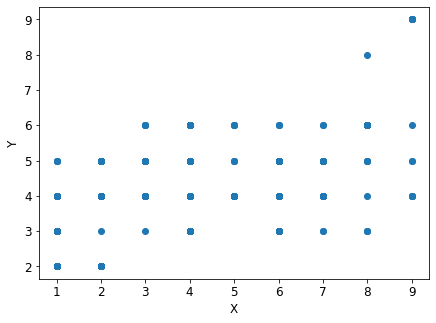

In [8]:
_ = plt.scatter(data['X'], data['Y'])
_ = plt.xlabel('X')
_ = plt.ylabel('Y')

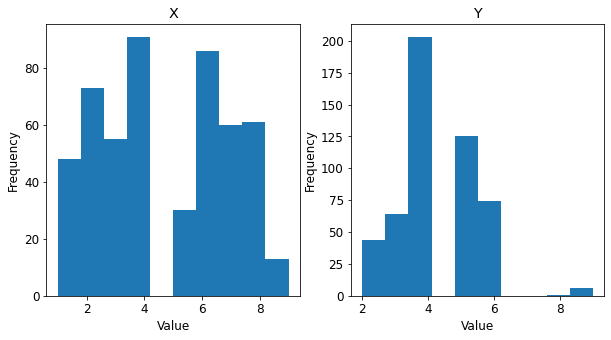

In [9]:
_, axes = plt.subplots(1, 2, figsize = (10, 5))
axes = axes.ravel()
_ = axes[0].hist(data['X'])
_ = axes[0].set(ylabel = 'Frequency', xlabel = 'Value', title = 'X')
_ = axes[1].hist(data['Y'])
_ = axes[1].set(ylabel = 'Frequency', xlabel = 'Value', title = 'Y')

In [10]:
# initiating preprocessing functions
spline = SplineTransformer()
scaler = MinMaxScaler()

In [11]:
s_data = data[['X', 'Y']]
y = data['area']

s_data_scaled = pd.DataFrame(scaler.fit_transform(s_data), columns = scaler.get_feature_names_out())

# getting the R2 score using the spatial data only
predictions = LinearRegression().fit(s_data_scaled, y).predict(s_data_scaled)
print(f'R2 score on the spatial data: {r2_score(y, predictions)}')

R2 score on the spatial data: 0.004178412808571008


In [12]:
# adding 6 splines of the X and Y attributes as found in literature and measuring the R2 score.

s_data_splined = pd.DataFrame(spline.fit_transform(s_data), columns = spline.get_feature_names_out())
s_data_scaled = pd.DataFrame(scaler.fit_transform(s_data_splined), columns = scaler.get_feature_names_out())

# getting the R2 score using the spline spatial data only
predictions = LinearRegression().fit(s_data_scaled, y).predict(s_data_scaled)
print(f'R2 score on the spatial data: {r2_score(y, predictions)}')

R2 score on the spatial data: 0.024734436932836723


In [13]:
# checking if the multiplication of the X and Y attributes produces better results or not.

s_data = pd.DataFrame(data['X'] * data['Y'], columns = ['Spatial'])

s_data_splined = pd.DataFrame(spline.fit_transform(s_data), columns = spline.get_feature_names_out())

s_data_scaled = pd.DataFrame(scaler.fit_transform(s_data_splined), columns = scaler.get_feature_names_out())

# getting the R2 score using the spatial data only
predictions = LinearRegression().fit(s_data_scaled, y).predict(s_data_scaled)
print(f'R2 score on the spatial spline data: {r2_score(y, predictions)}')

R2 score on the spatial spline data: 0.024250639395380413


#### b. Temporal Variables

In [14]:
print(data['day'].value_counts())

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [15]:
print(data['month'].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


In [16]:
# dictionary to replace days and months

days = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
         'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

In [17]:
# encoding the attributes

data['day'] = data['day'].replace(days)
data['month'] = data['month'].replace(months)

display(data.head())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


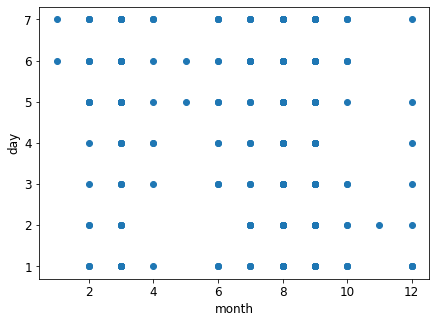

In [18]:
_ = plt.scatter(data['month'], data['day'])
_ = plt.xlabel('month')
_ = plt.ylabel('day')

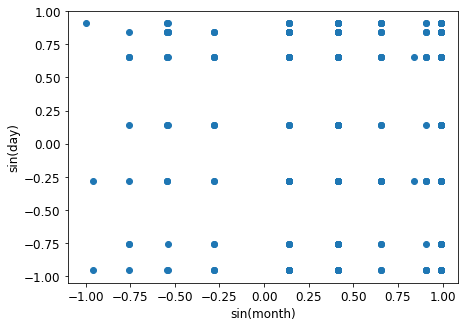

In [19]:
_ = plt.scatter(np.sin(data['month']), np.sin(data['day']))
_ = plt.xlabel('sin(month)')
_ = plt.ylabel('sin(day)')

In [20]:
# transforming the month and day data using a sinusiodal function

data['day'] = np.sin(data['day'])
data['month'] = np.sin(data['month'])

# renaming features after transformation
data.rename(columns = {'day': 'sin(day)', 'month': 'sin(month)'}, inplace = True)

In [21]:
# checking the advancement in the results using both the spatil and temporal data

st_data = data[['X', 'Y', 'sin(day)', 'sin(month)']]
predictions = LinearRegression().fit(st_data, y).predict(st_data)
print(f'R2 score on the combined spatial and temporal data: {r2_score(y, predictions)}')

R2 score on the combined spatial and temporal data: 0.00476805661789137


In [22]:
# now we add splines to the data and see if it produces better results

st_data_splined = pd.DataFrame(spline.fit_transform(st_data), columns = spline.get_feature_names_out())

st_data_scaled = pd.DataFrame(scaler.fit_transform(st_data_splined), columns = scaler.get_feature_names_out())

# getting the R2 score using the spatial data only
predictions = LinearRegression().fit(st_data_scaled, y).predict(st_data_scaled)
print(f'R2 score on the spatial and temporal spline data: {r2_score(y, predictions)}')

R2 score on the spatial and temporal spline data: 0.04096508340395211


#### c. FWI and M Variables

In [23]:
# getting featuers names in one list

features_names = list(data.columns)
features_names.remove('area')
print(f'features names: \n{features_names}')

features names: 
['X', 'Y', 'sin(month)', 'sin(day)', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


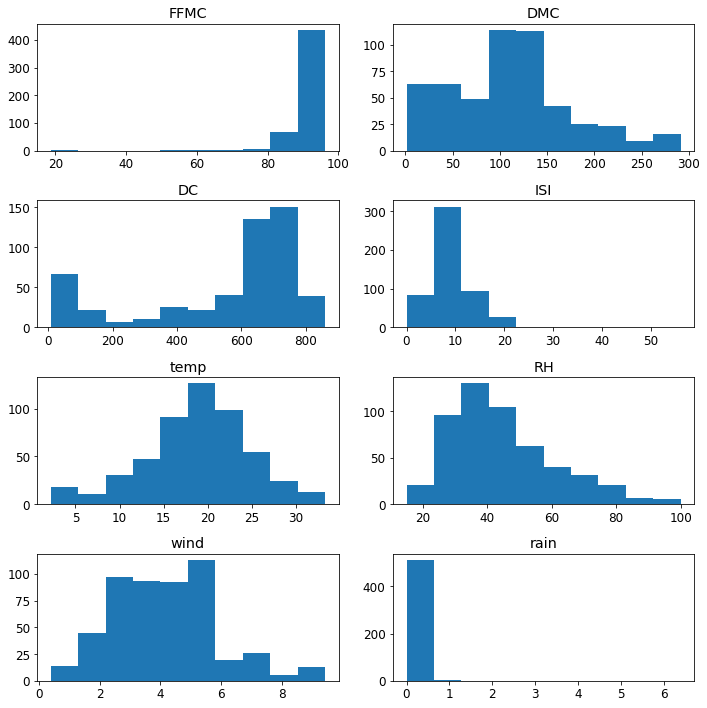

In [24]:
# plotting the distribution of the FWI and M features

_, axes = plt.subplots(4, 2, figsize = (10, 10))
axes = axes.ravel()

for i, feature in enumerate(features_names[4:]):
    axes[i].hist(data[feature])
    axes[i].set_title(feature)

plt.tight_layout()

In [25]:
# now we'll get the features with skew value greater than 0.75

skew_values = data[features_names[3:]].skew()
skew_columns = skew_values[np.abs(skew_values) > 0.75].index.to_list()
print(f'skewed features greater than 0.75 ares: {skew_columns}')

skewed features greater than 0.75 ares: ['FFMC', 'DC', 'ISI', 'RH', 'rain']


In [26]:
# transforming skewed values using log transformation

for skewed in skew_columns:
    data[skewed] = np.log1p(data[skewed])
    data.rename(columns = {skewed: f'log({skewed})'}, inplace = True)

In [27]:
# transforming the target variable using the same log transformation as suggested by UCI

data['area'] = np.log1p(data['area'])
data.rename(columns = {'area': 'log(area)'}, inplace = True)

# saving the processed version of data to use it later
data.to_csv('forestfires_processed.csv')

## 4. Modeling

### A. Linear Regression

#### a. Training on the full dataset

In [28]:
display(data)

,X,Y,sin(month),sin(day),log(FFMC),DMC,log(DC),log(ISI),temp,log(RH),wind,log(rain),log(area)
0,7,5,0.141120,-0.958924,4.468204,26.2,4.557030,1.808289,8.2,3.951244,6.7,0.000000,0.000000
1,7,4,-0.544021,0.909297,4.517431,35.4,6.507427,2.041220,18.0,3.526361,0.9,0.000000,0.000000
2,7,4,-0.544021,-0.279415,4.517431,43.7,6.533643,2.041220,14.6,3.526361,1.3,0.000000,0.000000
3,8,6,0.141120,-0.958924,4.529368,33.3,4.363099,2.302585,8.3,4.584967,4.0,0.182322,0.000000
4,8,6,0.141120,0.656987,4.503137,51.3,4.636669,2.360854,11.4,4.605170,1.8,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,0.989358,0.656987,4.414010,56.7,6.502190,1.064711,27.8,3.496508,2.7,0.000000,2.006871
513,2,4,0.989358,0.656987,4.414010,56.7,6.502190,1.064711,21.9,4.276666,5.8,0.000000,4.012592
514,7,4,0.989358,0.656987,4.414010,56.7,6.502190,1.064711,21.2,4.262680,6.7,0.000000,2.498152
515,1,4,0.989358,-0.279415,4.558079,146.0,6.422760,2.509599,25.6,3.761200,4.0,0.000000,0.000000


In [29]:
# splitting the data into train and test sets

X, y = data.drop(columns = ['log(area)']), data['log(area)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 42)

In [30]:
# fitting a linear regression model

linear = LinearRegression().fit(X_train, y_train)
train_preds = linear.predict(X_train)
test_preds = linear.predict(X_test)

# R2 score on the training and test sets
print(f'R2 score on the training data: {r2_score(y_train, train_preds)}')
print(f'R2 score on the testing data: {r2_score(y_test, test_preds)}')

R2 score on the training data: 0.02624551823574761
R2 score on the testing data: 0.020016648164064788


In [31]:
# adding splines of the X and Y variables only and training on the new dataframe

# getting the features and target data without X and Y
X, y = data.drop(columns = ['X', 'Y', 'log(area)']), data['log(area)']

# making 6 splines of X and Y variables each
xy_splined = pd.DataFrame(spline.fit_transform(data[['X', 'Y']]), columns = spline.get_feature_names_out())

# adding the new features data frame
X = pd.concat([xy_splined, X], axis = 1)
print(f'shape of splines data: {X.shape}')

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# scaling the data
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = scaler.get_feature_names_out())
X_test = pd.DataFrame(scaler.transform(X_test), columns = scaler.get_feature_names_out())


# fitting the same linear regression model
linear = LinearRegression().fit(X_train, y_train)
train_preds = linear.predict(X_train)
test_preds = linear.predict(X_test)

# R2 score on the training and test sets
print(f'R2 score on the training spline data: {r2_score(y_train, train_preds)}')
print(f'R2 score on the testing spline data: {r2_score(y_test, test_preds)}')

shape of splines data: (517, 24)
R2 score on the training spline data: 0.06609238533390227
R2 score on the testing spline data: -0.00793185555410636


In [32]:
# coss validate on the entire data

# getting features and target data
X, y = data.drop(columns = ['log(area)']), data['log(area)']

# defining the cross validation splitting folds
folds = KFold(n_splits = 10, random_state = 42, shuffle = True)

# cross validation of a linear regression model
linear = LinearRegression()
max_score = np.max(cross_val_score(linear, X, y, cv = folds, scoring = 'r2'))
print(f'maximum R2 score from cross validation: {max_score}')

maximum R2 score from cross validation: 0.06734455393502425


In [33]:
# regressing on the nonzero data only

# getting the nonzero data
nonzero_data = data[data['log(area)'] != 0].reset_index()

X, y = nonzero_data.drop(columns = ['log(area)']), nonzero_data['log(area)']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# scaling the data
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = scaler.get_feature_names_out())
X_test = pd.DataFrame(scaler.transform(X_test), columns = scaler.get_feature_names_out())

# fitting a linear regression model
linear = LinearRegression().fit(X_train, y_train)
train_preds = linear.predict(X_train)
test_preds = linear.predict(X_test)


# R2 score on the training and test sets
print(f'R2 score on the training nonzero spline data: {r2_score(y_train, train_preds)}')
print(f'R2 score on the testing nonzero spline data: {r2_score(y_test, test_preds)}')

R2 score on the training nonzero spline data: 0.10185388319440958
R2 score on the testing nonzero spline data: -0.20179831884602772


In [34]:
# regressing on the nonzero splined data

X, y = nonzero_data.drop(columns = ['X', 'Y', 'log(area)']), nonzero_data['log(area)']

xy_splined = pd.DataFrame(spline.fit_transform(nonzero_data[['X', 'Y']]), columns = spline.get_feature_names_out())
X = pd.concat([xy_splined, X], axis = 1)


# cross validation of a linear regression model
linear = LinearRegression()
max_score = np.max(cross_val_score(linear, X, y, cv = folds, scoring = 'r2'))
print(f'maximum R2 score from cross validation on the nonzero data: {max_score}')

maximum R2 score from cross validation on the nonzero data: 0.0564335474026284


#### b. Training on only 7 features out of 12

In [35]:
# function to loop through the selected features sets and print the maximum R2 score

def scoringfn(model = LinearRegression(), data = data, num_features = 7, nonzero = False, splines = False):
    # creating empty lists to save the scores
    train_scores = []
    test_scores = []
    
    if nonzero:
        data = data[data['log(area)'] != 0].reset_index()
    
    # splitting the data into target and features
    X, y = data.drop(columns = ['log(area)']), data['log(area)']
        
    # adding splines to the X and Y variables only
    if splines and type(LinearRegression()).__name__ == 'LinearRegression':
        spline = SplineTransformer()
        spline.fit(X[['X', 'Y']])
        xy_splined = pd.DataFrame(spline.transform(X[['X', 'Y']]), columns = spline.get_feature_names_out())
        X.drop(columns = ['X', 'Y'])
        X = pd.concat([xy_splined, X], axis = 1)
                         
        
    # splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       test_size = 0.25, random_state = 42)
    
    # scaling the data
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = scaler.get_feature_names_out())
    X_test = pd.DataFrame(scaler.transform(X_test), columns = scaler.get_feature_names_out())

    
    # initializing the feature selection process
    select = RFE(model, n_features_to_select = num_features)
    select.fit(X_train, y_train)
    print(f'features selected are:\n{X_train.columns[select.get_support()]}')
    
    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)
    
        
    # fitting the model and storing the scores
    linear = model.fit(X_train_selected, y_train)
    train_preds = linear.predict(X_train_selected)
    test_preds = linear.predict(X_test_selected)
    train_scores.append(r2_score(y_train, train_preds))
    test_scores.append(r2_score(y_test, test_preds))
    
    print(f'maximum R2 score on the training data: {np.max(train_scores)}')
    print(f'maximum R2 score on the testing data: {np.max(test_scores)}')

In [36]:
# training using the 7 features out of 12 and with the full zero data without splines
scoringfn()

features selected are:
Index(['X', 'sin(month)', 'log(FFMC)', 'DMC', 'log(ISI)', 'wind', 'log(rain)'], dtype='object')
maximum R2 score on the training data: 0.02614115249579574
maximum R2 score on the testing data: -0.004236517488444669


In [37]:
# training using the 7 features out of 12 and with the full zero data with splines
scoringfn(splines = True)

features selected are:
Index(['X_sp_0', 'X_sp_1', 'X_sp_2', 'X_sp_3', 'X_sp_4', 'X_sp_5', 'X'], dtype='object')
maximum R2 score on the training data: 0.013773214693851066
maximum R2 score on the testing data: -0.010988863026106577


In [38]:
# training using the 7 features out of 12 and with nonzero data without spline
scoringfn(nonzero = True)

features selected are:
Index(['X', 'Y', 'sin(month)', 'DMC', 'log(DC)', 'temp', 'log(RH)'], dtype='object')
maximum R2 score on the training data: 0.0828973014486063
maximum R2 score on the testing data: -0.18953736467508953


In [39]:
# training using the 7 features out of 12 and with nonzero data with splines
scoringfn(nonzero = True, splines = True)

features selected are:
Index(['X_sp_0', 'X_sp_1', 'X_sp_2', 'X_sp_3', 'X_sp_4', 'X_sp_5', 'X'], dtype='object')
maximum R2 score on the training data: -0.0013220779940312788
maximum R2 score on the testing data: -0.0941071144296135


### B. Ridge Regression

#### a. Training on the full dataset

In [40]:
# we will perform Ridge cross validation test on the data and look for the best R2 score

ridgecv = RidgeCV()

# training on the full dataset with all the features
scoringfn(model = ridgecv, num_features = 12)

features selected are:
Index(['X', 'Y', 'sin(month)', 'sin(day)', 'log(FFMC)', 'DMC', 'log(DC)',
       'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'],
      dtype='object')
maximum R2 score on the training data: 0.02167095369322325
maximum R2 score on the testing data: 0.0020225419919603915


In [41]:
# training on the nonzero dataset with all the features
scoringfn(model = ridgecv, num_features = 12, nonzero = True)

features selected are:
Index(['index', 'X', 'Y', 'sin(month)', 'sin(day)', 'log(FFMC)', 'DMC',
       'log(DC)', 'log(ISI)', 'log(RH)', 'wind', 'log(rain)'],
      dtype='object')
maximum R2 score on the training data: 0.06255656338416415
maximum R2 score on the testing data: -0.09357924722105593


#### b. Training on only 7 features out of 12

In [42]:
print('training on 7 features out of 12')
print('----------------------------------\n')


# training on the full dataset
print('full dataset')
scoringfn(model = ridgecv)
print('----------------------------------\n')

# training on the nonzero dataset
print('nonzero dataset')
scoringfn(model = ridgecv, nonzero = True)

training on 7 features out of 12
----------------------------------

full dataset
features selected are:
Index(['X', 'Y', 'sin(month)', 'log(FFMC)', 'DMC', 'log(DC)', 'wind'], dtype='object')
maximum R2 score on the training data: 0.021477362289535895
maximum R2 score on the testing data: -0.002353534991608397
----------------------------------

nonzero dataset
features selected are:
Index(['index', 'X', 'Y', 'sin(month)', 'DMC', 'log(RH)', 'wind'], dtype='object')
maximum R2 score on the training data: 0.08327703590716906
maximum R2 score on the testing data: -0.14269708120083946


### C. Lasso Regression

#### a. training on the full dataset

In [43]:
lassocv = LassoCV()

# training on the full dataset with all the features
scoringfn(model = lassocv, num_features = 12)

features selected are:
Index(['X', 'Y', 'sin(month)', 'sin(day)', 'log(FFMC)', 'DMC', 'log(DC)',
       'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'],
      dtype='object')
maximum R2 score on the training data: 0.015549844913635313
maximum R2 score on the testing data: -0.013516717124470556


In [44]:
# training on the nonzero dataset with all the features
scoringfn(model = lassocv, num_features = 12, nonzero = True)

features selected are:
Index(['index', 'X', 'Y', 'sin(month)', 'sin(day)', 'DMC', 'log(DC)',
       'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'],
      dtype='object')
maximum R2 score on the training data: 0.09572138365068328
maximum R2 score on the testing data: -0.1563593217921846


#### b. Training on 7 features out of 12

In [45]:
print('training on 7 features out of 12')
print('----------------------------------\n')


# training on the full dataset
print('full dataset')
scoringfn(model = lassocv)
print('----------------------------------\n')

# training on the nonzero dataset
print('nonzero dataset')
scoringfn(model = lassocv, nonzero = True)

training on 7 features out of 12
----------------------------------

full dataset
features selected are:
Index(['X', 'DMC', 'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'], dtype='object')
maximum R2 score on the training data: 0.01641576254675592
maximum R2 score on the testing data: -0.01525724126909278
----------------------------------

nonzero dataset
features selected are:
Index(['X', 'Y', 'sin(month)', 'DMC', 'log(DC)', 'log(RH)', 'wind'], dtype='object')
maximum R2 score on the training data: 0.08673270282755774
maximum R2 score on the testing data: -0.19518771610585062


### D. Elastic Net Regression

#### a. Training on the full dataset

In [46]:
elasticnetcv = ElasticNetCV()

# training on the full dataset with all the features
scoringfn(model = elasticnetcv, num_features = 12)

features selected are:
Index(['X', 'Y', 'sin(month)', 'sin(day)', 'log(FFMC)', 'DMC', 'log(DC)',
       'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'],
      dtype='object')
maximum R2 score on the training data: 0.014632326158540376
maximum R2 score on the testing data: -0.011988575096204324


In [47]:
# training on the nonzero dataset with all the features
scoringfn(model = elasticnetcv, num_features = 12, nonzero = True)

features selected are:
Index(['index', 'X', 'Y', 'sin(month)', 'sin(day)', 'DMC', 'log(DC)',
       'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'],
      dtype='object')
maximum R2 score on the training data: 0.09131379599915701
maximum R2 score on the testing data: -0.1402831305917236


#### b. Training on only 7 features out of 12

In [48]:
print('training on 7 features out of 12')
print('----------------------------------\n')


# training on the full dataset
print('full dataset')
scoringfn(model = elasticnetcv)
print('----------------------------------\n')

# training on the nonzero dataset
print('nonzero dataset')
scoringfn(model = elasticnetcv)

training on 7 features out of 12
----------------------------------

full dataset
features selected are:
Index(['X', 'DMC', 'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'], dtype='object')
maximum R2 score on the training data: 0.01789857479415624
maximum R2 score on the testing data: -0.013661839548300803
----------------------------------

nonzero dataset
features selected are:
Index(['X', 'DMC', 'log(ISI)', 'temp', 'log(RH)', 'wind', 'log(rain)'], dtype='object')
maximum R2 score on the training data: 0.01789857479415624
maximum R2 score on the testing data: -0.013661839548300803


## 5. Summary

* In this notebook I have explored different regression models trying to come up with good R2 scores but the data distributions and coorelations among features themselves and with the target vaiable are not satisfying the linear regression models.<br>
* Also, as suggested from literatures, i have tried using different subsets of the full data and tried to regress on only the nonzero observations but still no good results show up.<br>
* For the sake of finding different interactions among data features, I tried different techniques including adding polynomial and spline features. Yet, nothing produced good results but the spline transform proved to have good significance on the R2 score. For that reason, I only included the spline transformations and obmitted the polynomial transformations.<br>
* In addition, I defined a function to print out the maximum R2 score when selecting subset features of the full data attributes. I used two techniques: the first was using different combinations using the `combinations` class from the `itertools` library, and the second was using automatic feature selection from `feature_selection` module. When using automatic feature selection, I used only the `RFE` (recursive feature elemination) class for having the best selection process.<br>
* Lastly, I reied different transormation techniques on the features including `boxcox` transformation, but it gave errors. So, I kept only the `np.sin` and `np.log1p`.

# End of Linear Regression